In [205]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
df = pd.read_csv("new_train.csv", header=0)


df=df.dropna()




In [206]:
df.columns

Index(['Homepage', 'Homepage _Duration', 'Aboutus', 'Aboutus_Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [207]:
b=['Homepage', 'Homepage _Duration', 'Aboutus_Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month',
       'TrafficType', ]
 
a=['Homepage', 'Homepage _Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType']

X = df[b]

y = df['Revenue']

In [208]:
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
X = preprocessing.scale(X)

In [209]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state=42)

In [210]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=2), n_estimators=35,
algorithm="SAMME.R", learning_rate=0.193
)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [211]:
from sklearn import metrics
y_pred = ada_clf.predict(x_validation)
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.8997134670487106


In [212]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,
                          max_depth=10)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_validation)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))


Accuracy: 0.9011461318051576


In [213]:
# predictions=clf.predict(x_test)
# i_d=range(1,1851)
# di_ct={'ID':i_d,'Revenue':predictions}

# testdf=pd.DataFrame(di_ct)
# testdf.to_csv('file2.csv', header=True, index=False) 



In [214]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=b).sort_values(ascending=False)
feature_imp

PageValues            0.529561
ExitRates             0.089406
Contactus_Duration    0.075358
Contactus             0.062068
BounceRates           0.061003
Homepage _Duration    0.049436
Month                 0.045537
Homepage              0.041603
TrafficType           0.023235
Aboutus_Duration      0.022793
dtype: float64

No handles with labels found to put in legend.


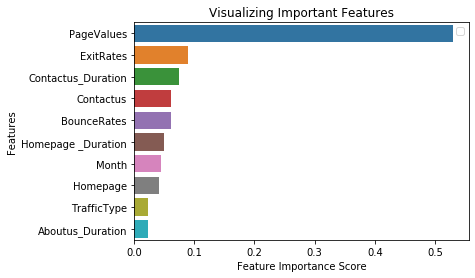

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [18]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(a, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)      
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: PageValues           Importance: 0.52
Variable: ExitRates            Importance: 0.09
Variable: Contactus_Duration   Importance: 0.07
Variable: Contactus            Importance: 0.06
Variable: Homepage _Duration   Importance: 0.05
Variable: BounceRates          Importance: 0.05
Variable: Homepage             Importance: 0.04
Variable: Month                Importance: 0.04
Variable: Province             Importance: 0.02
Variable: TrafficType          Importance: 0.02
Variable: VisitorType          Importance: 0.02
Variable: OperatingSystems     Importance: 0.01
Variable: Browser              Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None, None, None]

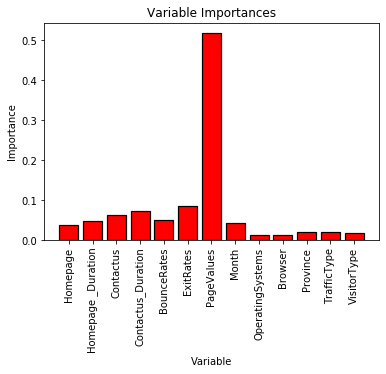

In [21]:
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, a, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


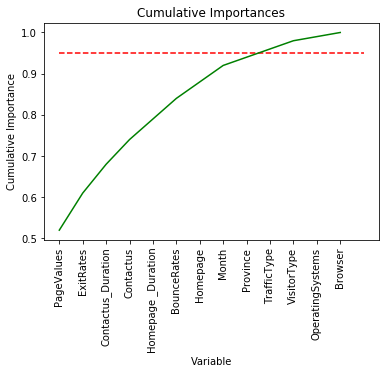

In [22]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [23]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 10


In [25]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# Find the columns of the most important features
important_indices = [a.index(feature) for feature in important_feature_names]

In [28]:
important_train_features = x_train[:, important_indices]
important_test_features = x_validation[:, important_indices]

In [29]:
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (8372, 5)
Important test features shape: (2094, 5)


In [132]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None],
    
    
}


In [133]:
y_pred=clf1.predict(important_test_features)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))


Accuracy: 0.8973256924546322


In [134]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [135]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [136]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 250}


0.851 + or -0.009 for the {'max_depth': 2, 'n_estimators': 5}
0.85 + or -0.005 for the {'max_depth': 2, 'n_estimators': 10}
0.846 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.846 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.846 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.892 + or -0.004 for the {'max_depth': 4, 'n_estimators': 5}
0.881 + or -0.012 for the {'max_depth': 4, 'n_estimators': 10}
0.89 + or -0.006 for the {'max_depth': 4, 'n_estimators': 50}
0.889 + or -0.005 for the {'max_depth': 4, 'n_estimators': 100}
0.891 + or -0.005 for the {'max_depth': 4, 'n_estimators': 250}
0.896 + or -0.006 for the {'max_depth': 8, 'n_estimators': 5}
0.899 + or -0.004 for the {'max_depth': 8, 'n_estimators': 10}
0.901 + or -0.007 for the {'max_depth': 8, 'n_estimators': 50}
0.902 + or -0.005 for the {'max_depth': 8, 'n_estimators': 100}
0.902 + or -0.006 for the {'max_depth': 8, 'n_estimators': 250

In [137]:
import seaborn as sns

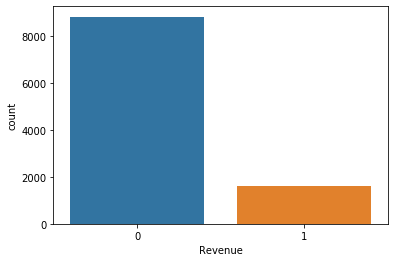

In [138]:
sns.countplot(y,label="Sum")

plt.show()

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
LDA = SVC(gamma="auto")
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [152]:
LDA_accuracy

0.8938205339232221